# A custom function for a common operation

Adding the identity to a square matrix is sometimes useful. *numpy* is not optimized for such operations. It is worth to implement in cython.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Ckecking it is working

In [3]:
import numpy
from mloptonnx.experimentation.numpyx import add_eye_inplace

m = numpy.random.randn(4, 4).astype(numpy.float64) * 0
m1 = m + numpy.identity(m.shape[0])
add_eye_inplace(m)

In [4]:
m1 - m

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

It works

## Benchmark

In [5]:
import time
from pandas import DataFrame
from tqdm import tqdm

repeat = 1000
data = []
for i in tqdm([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]):
    r = int(repeat / i * 100)
    M = numpy.random.randn(i, i).astype(numpy.float64)
    begin = time.perf_counter()
    for _ in range(r):
        M += numpy.identity(i)
    end = time.perf_counter() - begin
    
    obs = {'N': i, 'time_numpy': end / r}

    begin = time.perf_counter()
    for _ in range(r):
        add_eye_inplace(M)
    end = time.perf_counter() - begin
    
    obs.update({'time_add_eye_inplace': end / r})
    data.append(obs)

df = DataFrame(data).set_index('N')
df

100%|██████████| 10/10 [00:01<00:00,  6.07it/s]


,time_numpy,time_add_eye_inplace
N,,
1,0.000005,6.219700e-07
2,0.000003,5.847680e-07
5,0.000004,6.195100e-07
10,0.000003,6.086200e-07
20,0.000005,7.043800e-07
50,0.000006,5.824501e-07
100,0.000011,6.358000e-07
200,0.000032,6.638002e-07
500,0.000651,1.098000e-06


## Plots

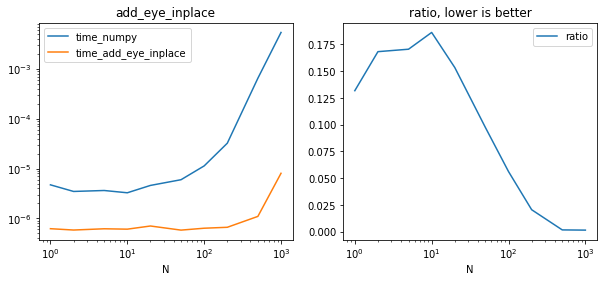

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df[["time_numpy", "time_add_eye_inplace"]].plot(
    ax=ax[0], title="add_eye_inplace", logy=True, logx=True)
df["ratio"] = df["time_add_eye_inplace"] / df["time_numpy"]
df[["ratio"]].plot(ax=ax[1], title="ratio, lower is better", logx=True);